In [2]:
import os
import cv2
import numpy as np
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, Rotate, RandomBrightnessContrast,
    GaussNoise, RandomResizedCrop
)
import shutil
from tqdm import tqdm

# Define the input and output directories
input_dir = '/kaggle/input/thermal-images-diseased-healthy-leaves-paddy/thermal images UL' 
output_dir = '/kaggle/working/augmented_thermal_images'

# Create augmentation pipeline
def get_augmentation():
    return Compose([
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        Rotate(limit=45, p=0.5),
        RandomBrightnessContrast(p=0.5),
        GaussNoise(p=0.3),
        RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), p=0.5)
    ])

# Function to create augmented images
def augment_images(image_path, save_dir, num_augmentations=5):
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        return
    
    # Get file name
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    # Create augmentations
    augmentation = get_augmentation()
    
    # Save original image
    cv2.imwrite(os.path.join(save_dir, filename), image)
    
    # Create and save augmented images
    for i in range(num_augmentations):
        augmented = augmentation(image=image)['image']
        aug_filename = f"{name}aug{i}{ext}"
        cv2.imwrite(os.path.join(save_dir, aug_filename), augmented)

# Main processing
def process_dataset():
    # Create output directory
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)
    
    # Dictionary to store counts
    image_counts = {}
    
    # Process each class folder
    for class_name in ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']:
        # Create class directory in output
        class_output_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_output_dir)
        
        # Get input class directory
        class_input_dir = os.path.join(input_dir, class_name)
        
        # Process images in class directory
        image_files = [f for f in os.listdir(class_input_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        print(f"Processing {class_name}...")
        for image_file in tqdm(image_files):
            image_path = os.path.join(class_input_dir, image_file)
            augment_images(image_path, class_output_dir)
        
        # Count augmented images
        augmented_count = len(os.listdir(class_output_dir))
        image_counts[class_name] = augmented_count
        print(f"{class_name}: {augmented_count} images")
    
    return image_counts

# Run the processing

print("Starting augmentation process...")
final_counts = process_dataset()

print("\nFinal image counts after augmentation:")
for class_name, count in final_counts.items():
    print(f"{class_name}: {count} images")

Starting augmentation process...
Processing BLB...


100%|██████████| 220/220 [00:06<00:00, 34.93it/s]


BLB: 1320 images
Processing Blast...


100%|██████████| 67/67 [00:01<00:00, 35.99it/s]


Blast: 402 images
Processing healthy...


100%|██████████| 93/93 [00:02<00:00, 34.08it/s]


healthy: 558 images
Processing hispa...


100%|██████████| 142/142 [00:04<00:00, 34.07it/s]


hispa: 852 images
Processing leaf folder...


100%|██████████| 34/34 [00:00<00:00, 37.21it/s]


leaf folder: 204 images
Processing leaf spot...


100%|██████████| 80/80 [00:02<00:00, 34.60it/s]

leaf spot: 480 images

Final image counts after augmentation:
BLB: 1320 images
Blast: 402 images
healthy: 558 images
hispa: 852 images
leaf folder: 204 images
leaf spot: 480 images


Found 3816 files belonging to 6 classes.
Using 3053 files for training.
Found 3816 files belonging to 6 classes.
Using 763 files for validation.
Train batch shapes: (32, 224, 224, 3) (32, 6)
Validation batch shapes: (32, 224, 224, 3) (32, 6)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,696,134 (98.02 MB)

 Trainable params: 2,106,374 (8.04 MB)

 Non-trainable params: 23,589,760 (89.99 MB)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 309ms/step - accuracy: 0.3338 - loss: 1.8850 - val_accuracy: 0.6488 - val_loss: 1.0321 - learning_rate: 1.0000e-04
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.5550 - loss: 1.2596 - val_accuracy: 0.7090 - val_loss: 0.8226 - learning_rate: 1.0000e-04
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.6195 - loss: 1.0096 - val_accuracy: 0.7641 - val_loss: 0.7025 - learning_rate: 1.0000e-04
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.6756 - loss: 0.8931 - val_accuracy: 0.7995 - val_loss: 0.6224 - learning_rate: 1.0000e-04
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.7178 - loss: 0.7934 - val_accuracy: 0.8113 - val_loss: 0.5781 - learning_rate: 1.0000e-04
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.7272 - loss: 0.7573 - val_accuracy: 0.8113 - val_loss: 0.5477 - learning_rate: 1.0000e-04
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/ste

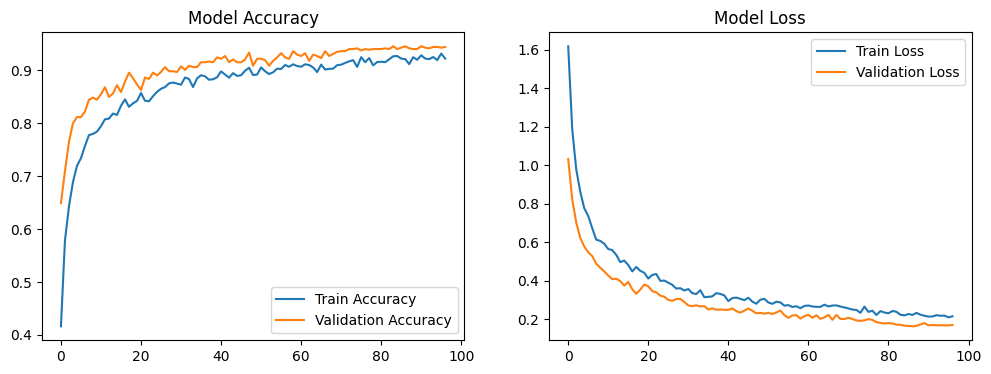

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, 
                                     Input, GlobalAveragePooling2D, Lambda)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# =============================
# 1. Dataset Setup and Preprocessing
# =============================

# Set dataset directory
dataset_dir = "/kaggle/working/augmented_thermal_images"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create tf.data.Datasets for training and validation
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='categorical'
)

# Data augmentation: rotations, zoom, flips and contrast adjustments
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomContrast(0.2),
])

# Apply data augmentation to training data and prefetch for performance
train_ds = train_ds.map(
    lambda x, y: (augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# Debug: Inspect dataset shapes
for images, labels in train_ds.take(1):
    print("Train batch shapes:", images.shape, labels.shape)
for images, labels in val_ds.take(1):
    print("Validation batch shapes:", images.shape, labels.shape)

# =============================
# 2. Build the ResNet Model
# =============================

# Use an input layer with the same dimensions
inputs = Input(shape=(224, 224, 3))

# NOTE:
# When using the pre-trained ResNet50 model, it is recommended to preprocess the
# input images as required by the network. The 'preprocess_input' function
# expects pixel values in the [0, 255] range (as provided by image_dataset_from_directory).
# We wrap it in a Lambda layer.
x = Lambda(lambda img: tf.keras.applications.resnet.preprocess_input(img))(inputs)

# Create the ResNet50 base model using ImageNet weights, excluding its top classification layer.
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=x
)

# Optionally, freeze the base model to focus training on the custom head.
base_model.trainable = False

# Add a global average pooling layer to reduce the spatial dimensions.
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Optional: add a fully connected block (you can adjust the number of neurons as desired)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Same dropout rate as in the AlexNet version
x = BatchNormalization()(x)

# Final output layer for 6 classes
outputs = Dense(6, activation='softmax')(x)

# Assemble the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with the Adam optimizer and a learning rate of 1e-4.
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary for verification
model.summary()

# =============================
# 3. Set Up Callbacks and Train the Model
# =============================

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_resnet.keras", monitor='val_accuracy', save_best_only=True, mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
]

history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=callbacks
)

# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the final model
model.save("thermal_disease_resnet.keras")

# =============================
# 4. Plot Training History
# =============================

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()